In [3]:
# List the inbuilt tools in langchain
# from langchain.tools import __all__ as public_api
# print('\n'.join(public_api)+'\n..')

In [2]:
#imports
from langchain_openai import OpenAI, OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.document_loaders import DirectoryLoader,TextLoader
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [3]:
loader = DirectoryLoader('./data',glob='./*.txt',loader_cls=TextLoader)
docs = loader.load()

In [4]:
docs

[Document(metadata={'source': 'data\\data1.txt'}, page_content="Elmwood Banking & Trust has firmly established itself as a beacon of financial reliability and personalized service in its community. With a deep understanding of its customers' needs, Elmwood offers a plethora of financial products and services, ensuring every individual's and business's financial goals are met with precision and care.\nThe bank's personal loan offerings are diverse, providing financial solutions for various life events. From home renovations to unexpected expenses, Elmwood's personal loans are structured with flexibility and competitive interest rates, making them accessible to a broad range of customers. For businesses, the bank offers commercial loans that are essential for growth and expansion. These loans are tailored to each business's unique needs, whether it's for upgrading equipment, expanding operations, or increasing working capital.\nElmwood's wealth management services are a cornerstone of it

In [5]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap = 20,
    length_function = len)
new_docs = text_splitter.split_documents(docs)
doc_strings = [doc.page_content for doc in new_docs]
doc_strings[0]

'Elmwood Banking & Trust has firmly established itself as a beacon of financial reliability and'

In [7]:
embeddings = OpenAIEmbeddings(model ="text-embedding-3-small")
vectors = embeddings.embed_documents(doc_strings)


In [8]:
db = Chroma.from_documents(new_docs,embeddings)
retriever = db.as_retriever(search_kwargs={"k": 6})

# Now Plot the graph

In [9]:
import umap
import numpy as np
from tqdm import tqdm
umap_transformer = umap.UMAP(random_state=0, transform_seed=0).fit(vectors)

c:\Maran\StudyMaterials\Git\LangChain\visualize-vector-embeddings\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Maran\StudyMaterials\Git\LangChain\visualize-vector-embeddings\venv\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [10]:
def umap_embed(vectors, umap_transformer):
    umap_embeddings = np.array([umap_transformer.transform([vector])[0] for vector in tqdm(vectors)])
    return umap_embeddings

In [11]:
global_embeddings = umap_embed(vectors, umap_transformer)
global_embeddings


100%|██████████| 71/71 [02:18<00:00,  1.95s/it]


array([[ 0.03561601,  4.3148966 ],
       [ 1.9351473 ,  3.8727772 ],
       [-0.5024663 ,  3.675402  ],
       [ 2.1346326 ,  2.0680118 ],
       [ 3.2963758 ,  2.6809845 ],
       [-0.6927646 ,  2.8960183 ],
       [-0.590501  ,  3.1890872 ],
       [-0.09375558,  1.544261  ],
       [-0.12302293,  1.5296376 ],
       [-0.9537554 ,  2.6065402 ],
       [-0.36311713,  1.604318  ],
       [-0.49080923,  1.5653664 ],
       [-0.37398258,  3.9868345 ],
       [ 1.9132667 ,  1.625374  ],
       [ 2.0245852 ,  1.8925648 ],
       [ 1.9009964 ,  1.6476425 ],
       [ 0.6820559 ,  1.3284668 ],
       [-0.54997194,  3.307988  ],
       [ 0.41597652,  1.3675619 ],
       [ 0.19612116,  1.4402466 ],
       [-0.06571633,  1.551452  ],
       [ 0.44004226,  1.3649704 ],
       [ 2.3852198 ,  2.3056457 ],
       [-0.34262854,  4.0158854 ],
       [ 1.5703977 ,  1.3150343 ],
       [-0.84522974,  2.973271  ],
       [ 0.3196297 ,  4.429661  ],
       [-0.5391029 ,  3.8585577 ],
       [-0.13218243,

(-1.3836673021316528, 8.074395012855529, 1.0831953227519988, 6.183652168512344)

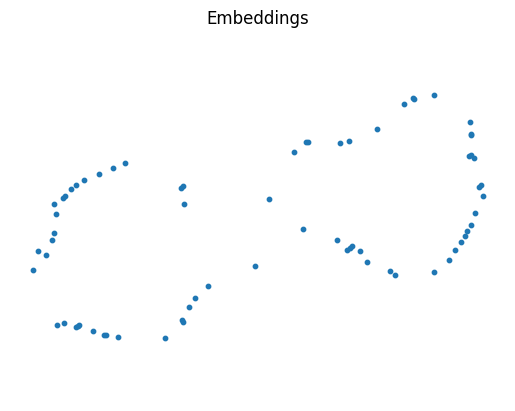

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(global_embeddings[:, 0], global_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Embeddings')
plt.axis('off')

In [13]:
def calc_global_embeddings(query, embeddings, retriever, umap_transformer, embed_function, global_embeddings):
    q_embedding = embeddings.embed_query(query)

    docs = retriever.get_relevant_documents(query)
    page_contents = [doc.page_content for doc in docs]
    vectors_content_vectors = embeddings.embed_documents(page_contents)

    query_embeddings = embed_function([q_embedding], umap_transformer)
    retrieved_embeddings = embed_function(vectors_content_vectors, umap_transformer)

    plt.figure()
    plt.scatter(global_embeddings[:, 0], global_embeddings[:, 1], s=10, color='gray')
    plt.scatter(query_embeddings[:, 0], query_embeddings[:, 1], s=150, marker='X', color='r')
    plt.scatter(retrieved_embeddings[:, 0], retrieved_embeddings[:, 1], s=50, facecolors='none', edgecolors='g')
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{query}')
    plt.axis('off')
    plt.show()

c:\Maran\StudyMaterials\Git\LangChain\visualize-vector-embeddings\venv\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
100%|██████████| 6/6 [00:11<00:00,  1.95s/it]


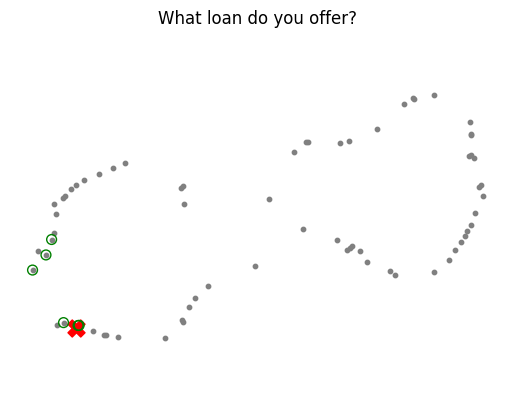

In [14]:
calc_global_embeddings("What loan do you offer?", embeddings, retriever, umap_transformer, umap_embed, global_embeddings)

100%|██████████| 6/6 [00:10<00:00,  1.73s/it]


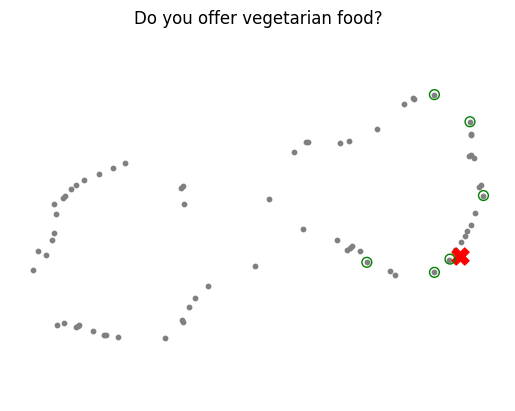

In [15]:
calc_global_embeddings("Do you offer vegetarian food?", embeddings, retriever, umap_transformer, umap_embed, global_embeddings)